In [2]:
import pandas as pd
import numpy as np

# Create academic performance dataset
data = {
    'Student_ID': range(1, 21),
    'Math_Score': [45, 78, 89, 90, 67, 55, 48, 91, 76, 85, 92, 95, None, 74, 88, 82, 77, 38, 99, 100],
    'Science_Score': [55, 81, 80, 85, 60, 45, 47, None, 78, 82, 84, 87, 70, 76, 92, 88, 73, 41, 110, 105],
    'English_Score': [65, 75, 80, 82, 60, 58, 56, 89, 74, 79, 85, 88, 72, 73, 90, 86, 70, 59, 95, 97],
    'Study_Hours': [2, 3, 2.5, 4, 3.5, 1, 1.5, 4.5, 2.2, 3.8, 5, 6, 3, 3.2, 6.5, 7, 2.5, 1.2, 8, 9]
}
df = pd.DataFrame(data)


In [3]:
df.head()

,Student_ID,Math_Score,Science_Score,English_Score,Study_Hours
0,1,45.0,55.0,65,2.0
1,2,78.0,81.0,75,3.0
2,3,89.0,80.0,80,2.5
3,4,90.0,85.0,82,4.0
4,5,67.0,60.0,60,3.5


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())


Student_ID       0
Math_Score       1
Science_Score    1
English_Score    0
Study_Hours      0
dtype: int64


In [5]:
# Using IQR to find outliers in Science_Score
Q1 = df['Science_Score'].quantile(0.25)
Q3 = df['Science_Score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Print outliers
print(df[df['Science_Score'] > upper])

# Cap outliers using upper bound
df['Science_Score'] = np.where(df['Science_Score'] > upper, upper, df['Science_Score'])


Empty DataFrame
Columns: [Student_ID, Math_Score, Science_Score, English_Score, Study_Hours]
Index: []


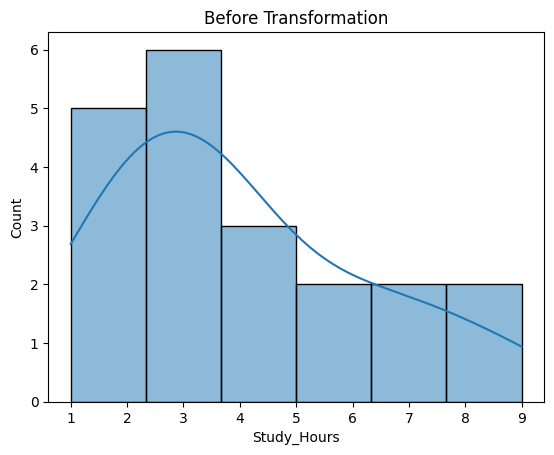

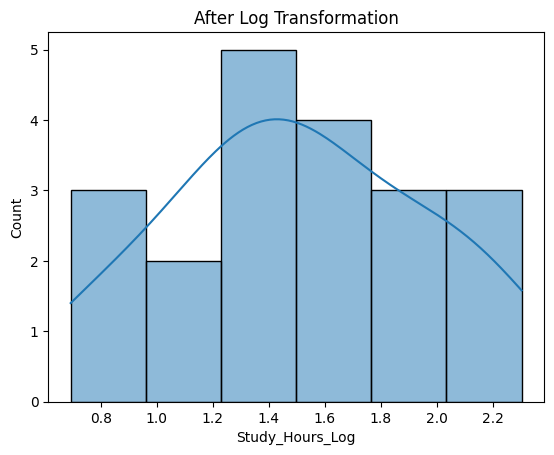

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Before transformation
sns.histplot(df['Study_Hours'], kde=True)
plt.title("Before Transformation")
plt.show()

# Log Transform to normalize right-skewed distribution
df['Study_Hours_Log'] = np.log1p(df['Study_Hours'])

# After transformation
sns.histplot(df['Study_Hours_Log'], kde=True)
plt.title("After Log Transformation")
plt.show()
